In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
tips=sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

# histogram

Text(0.5, 1.0, 'total bill disribution')

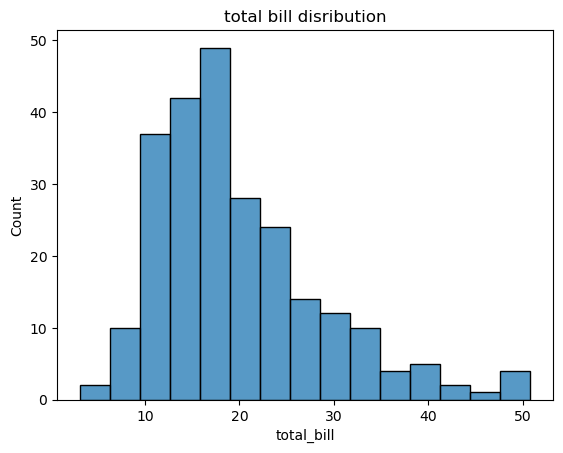

In [11]:
sns.histplot(tips['total_bill'],kde=False,bins=15)
plt.title('total bill disribution')

Text(0.5, 1.0, 'kde of total bill')

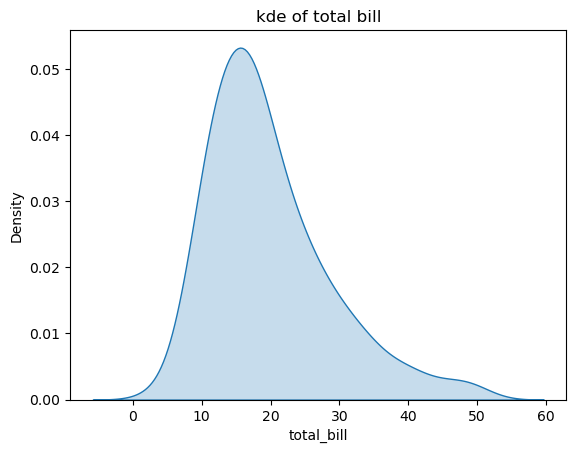

In [15]:
sns.kdeplot(tips['total_bill'],fill = True)
plt.title('kde of total bill')

# boxplot for outlier detection

<Axes: ylabel='tip'>

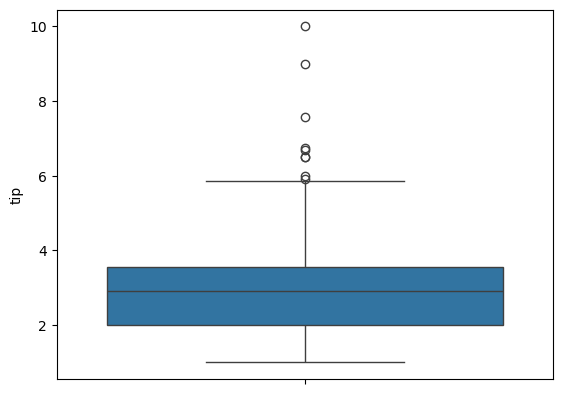

In [17]:
sns.boxplot(tips['tip'])

In [36]:
 np.percentile(tips['tip'], [25,50,75])

array([2.    , 2.9   , 3.5625])

In [24]:
help(np.percentile)

Help on _ArrayFunctionDispatcher in module numpy:

percentile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, interpolation=None)
    Compute the q-th percentile of the data along the specified axis.

    Returns the q-th percentile(s) of the array elements.

    Parameters
    ----------
    a : array_like of real numbers
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentage or sequence of percentages for the percentiles to compute.
        Values must be between 0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.

        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape a

In [37]:
q3 = np.percentile(tips['tip'],75)
q1 = np.percentile(tips['tip'],25)

In [38]:
q3,q1

(3.5625, 2.0)

In [39]:
iqr=q3-q1
iqr

1.5625

In [40]:
ub =q3+iqr*1.5
lb=q1-1.5*iqr
ub,lb

(5.90625, -0.34375)

In [41]:
# remove the outlier 

In [42]:
x= tips[(tips['tip']>lb) & (tips['tip']>ub)]

<Axes: ylabel='tip'>

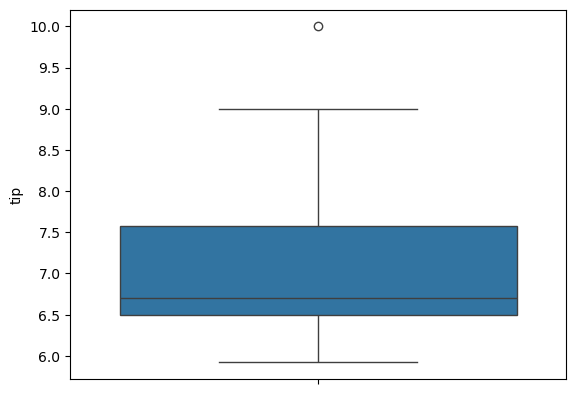

In [44]:
sns.boxplot(x['tip'])

In [45]:
# violin plot >> kde + box

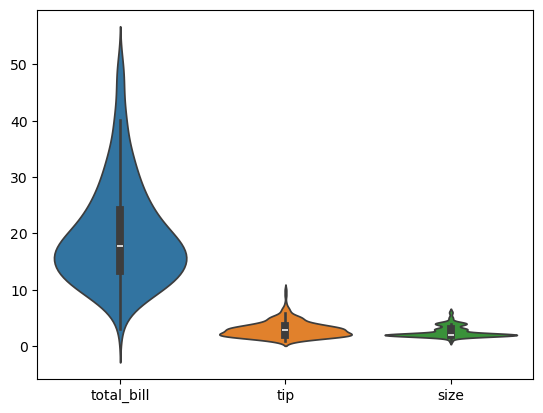

In [47]:
sns.violinplot(tips);

In [48]:
# stripplot >> filtered scatter plot  

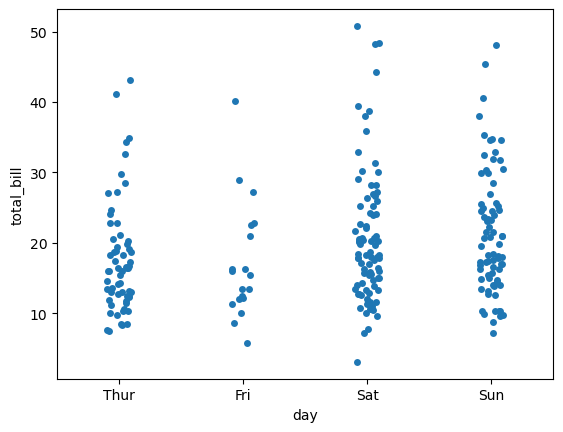

In [58]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter =True);

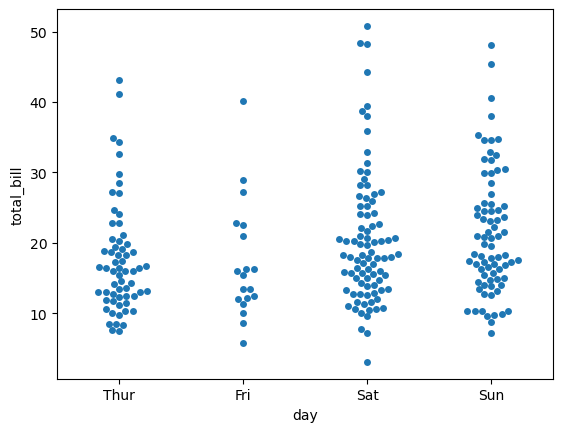

In [51]:
sns.swarmplot(x='day',y='total_bill',data = tips);

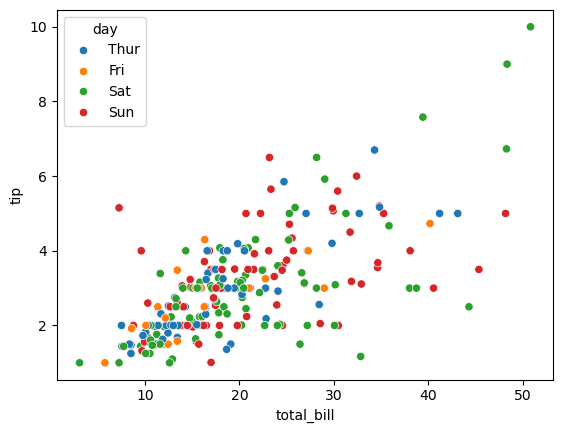

In [52]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='day');

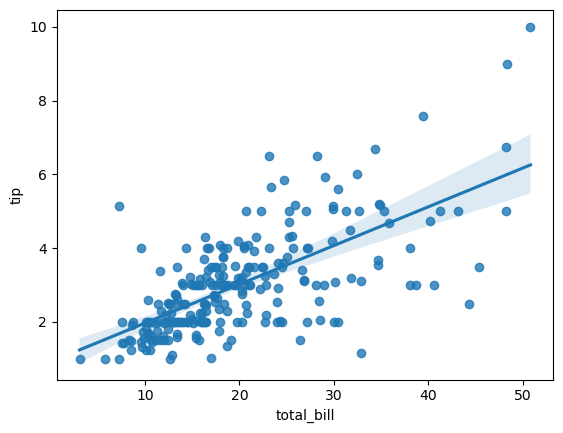

In [59]:
sns.regplot(x='total_bill',y='tip',data=tips);

In [64]:
# heatmap  # correlation is from -1 to 1

In [61]:
corr=tips.corr(numeric_only=True)

In [62]:
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


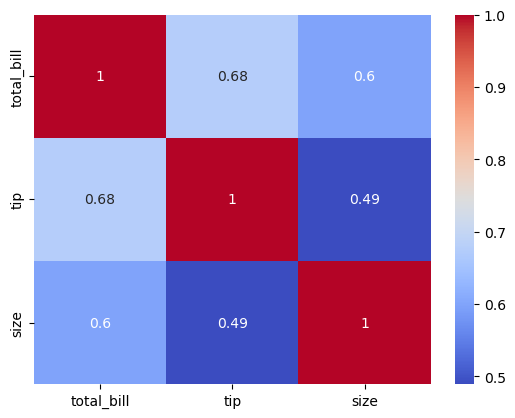

In [65]:
sns.heatmap(corr,annot=True,cmap='coolwarm');

In [66]:
# countplot

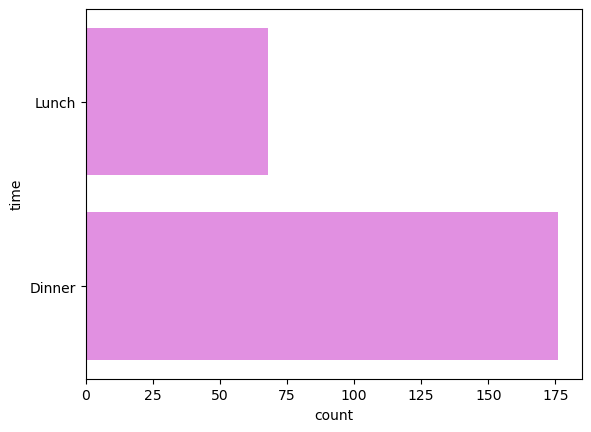

In [70]:
sns.countplot(tips['time'],color='violet');

In [71]:
# pair plot

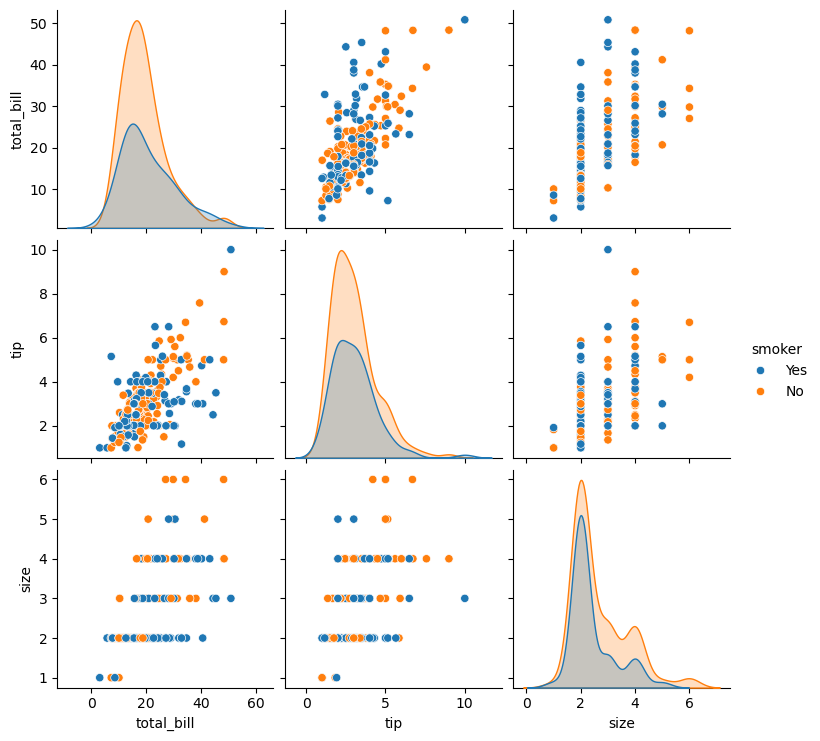

In [73]:
sns.pairplot(tips,hue='smoker');

In [74]:
# jointplot

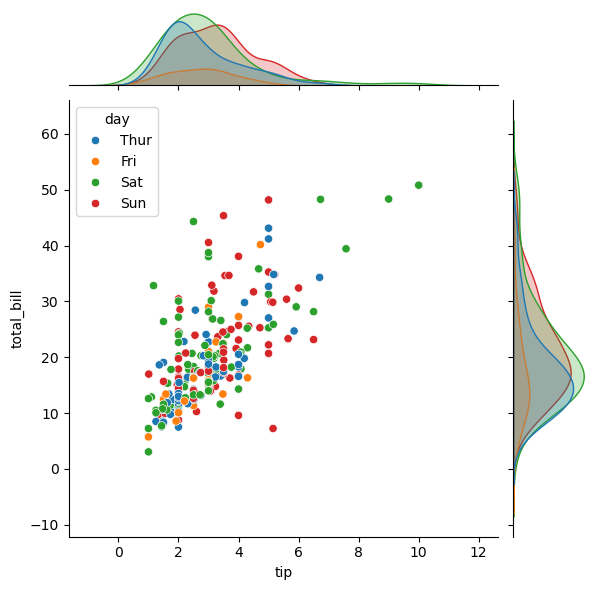

In [75]:
sns.jointplot(x='tip',y='total_bill',data=tips,hue='day');

In [81]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [82]:
sns.load_dataset('glue')

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4
